In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

from scipy.spatial.distance import pdist


from sortedness import sortedness, global_pwsortedness

from sklearn.impute import SimpleImputer
from sklearn.datasets import fetch_openml
from sklearn.datasets import load_iris
from sklearn.datasets import load_digits


from sklearn.preprocessing import StandardScaler

import umap
from sklearn.manifold  import TSNE
from sklearn.decomposition import PCA
from sklearn.manifold import MDS,Isomap
from sklearn.decomposition import FastICA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


from sklearn.model_selection import train_test_split,  KFold, cross_val_score, cross_val_predict
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix

#Logistic Regression:
from sklearn.linear_model import LogisticRegression
#Support Vector Machines (SVM):
from sklearn.svm import SVC
#Random Forest:
from sklearn.ensemble import RandomForestClassifier
#K-Nearest Neighbors (KNN):
from sklearn.neighbors import KNeighborsClassifier
#Decision Tree:
from sklearn.tree import DecisionTreeClassifier
#Gradient Boosting:
from sklearn.ensemble import GradientBoostingClassifier
#Gaussian Naive Bayes:
from sklearn.naive_bayes import GaussianNB
#AdaBoost:
from sklearn.ensemble import AdaBoostClassifier
#MLP
from sklearn.neural_network import MLPClassifier

/home/gildo/anaconda3/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/gildo/anaconda3/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/gildo/anaconda3/lib/python3.11/site-packages/umap/distances.py:1086: NumbaDeprecationWarni

In [3]:
digits = load_digits()

X = digits['data']
y = digits['target']

X_train, X_test, y_train, y_test,  = train_test_split(X, y, random_state=42, test_size=0.2)

In [4]:
X.shape

(1797, 64)

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [6]:
pca = PCA(n_components=50)
pca.fit(X_train)
X_train_pca50 = pca.transform(X_train)

pca.fit(X_test)
X_test_pca50 = pca.transform(X_test)

In [7]:
n_components = 2

pca = PCA(n_components=n_components)
pca.fit(X_train_pca50)
X_pca_train = pca.transform(X_train_pca50)

pca = PCA(n_components=n_components)
pca.fit(X_test_pca50)
X_pca_test = pca.transform(X_test_pca50)

In [8]:
mds = MDS(n_components=n_components, random_state=42)
X_mds_train = mds.fit_transform(X_train_pca50)
X_mds_test = mds.fit_transform(X_test_pca50)

ica = FastICA(n_components=n_components)
ica.fit(X_train_pca50)
X_ica_train = ica.transform(X_train_pca50)
ica.fit(X_test_pca50)
X_ica_test = ica.transform(X_test_pca50)

isomap = Isomap(n_components=n_components)
X_isomap_train = isomap.fit_transform(X_train_pca50)
X_isomap_test = isomap.fit_transform(X_test_pca50)

tsne = TSNE(random_state = 42, n_components=n_components,verbose=0, perplexity=40, n_iter=300)
X_tsne_train = tsne.fit_transform(X_train_pca50)
X_tsne_test = tsne.fit_transform(X_test_pca50)

umap_model = umap.UMAP(n_components=n_components)
X_umap_train = umap_model.fit_transform(X_train_pca50)
X_umap_test = umap_model.fit_transform(X_test_pca50)

/home/gildo/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/home/gildo/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/home/gildo/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/home/gildo/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


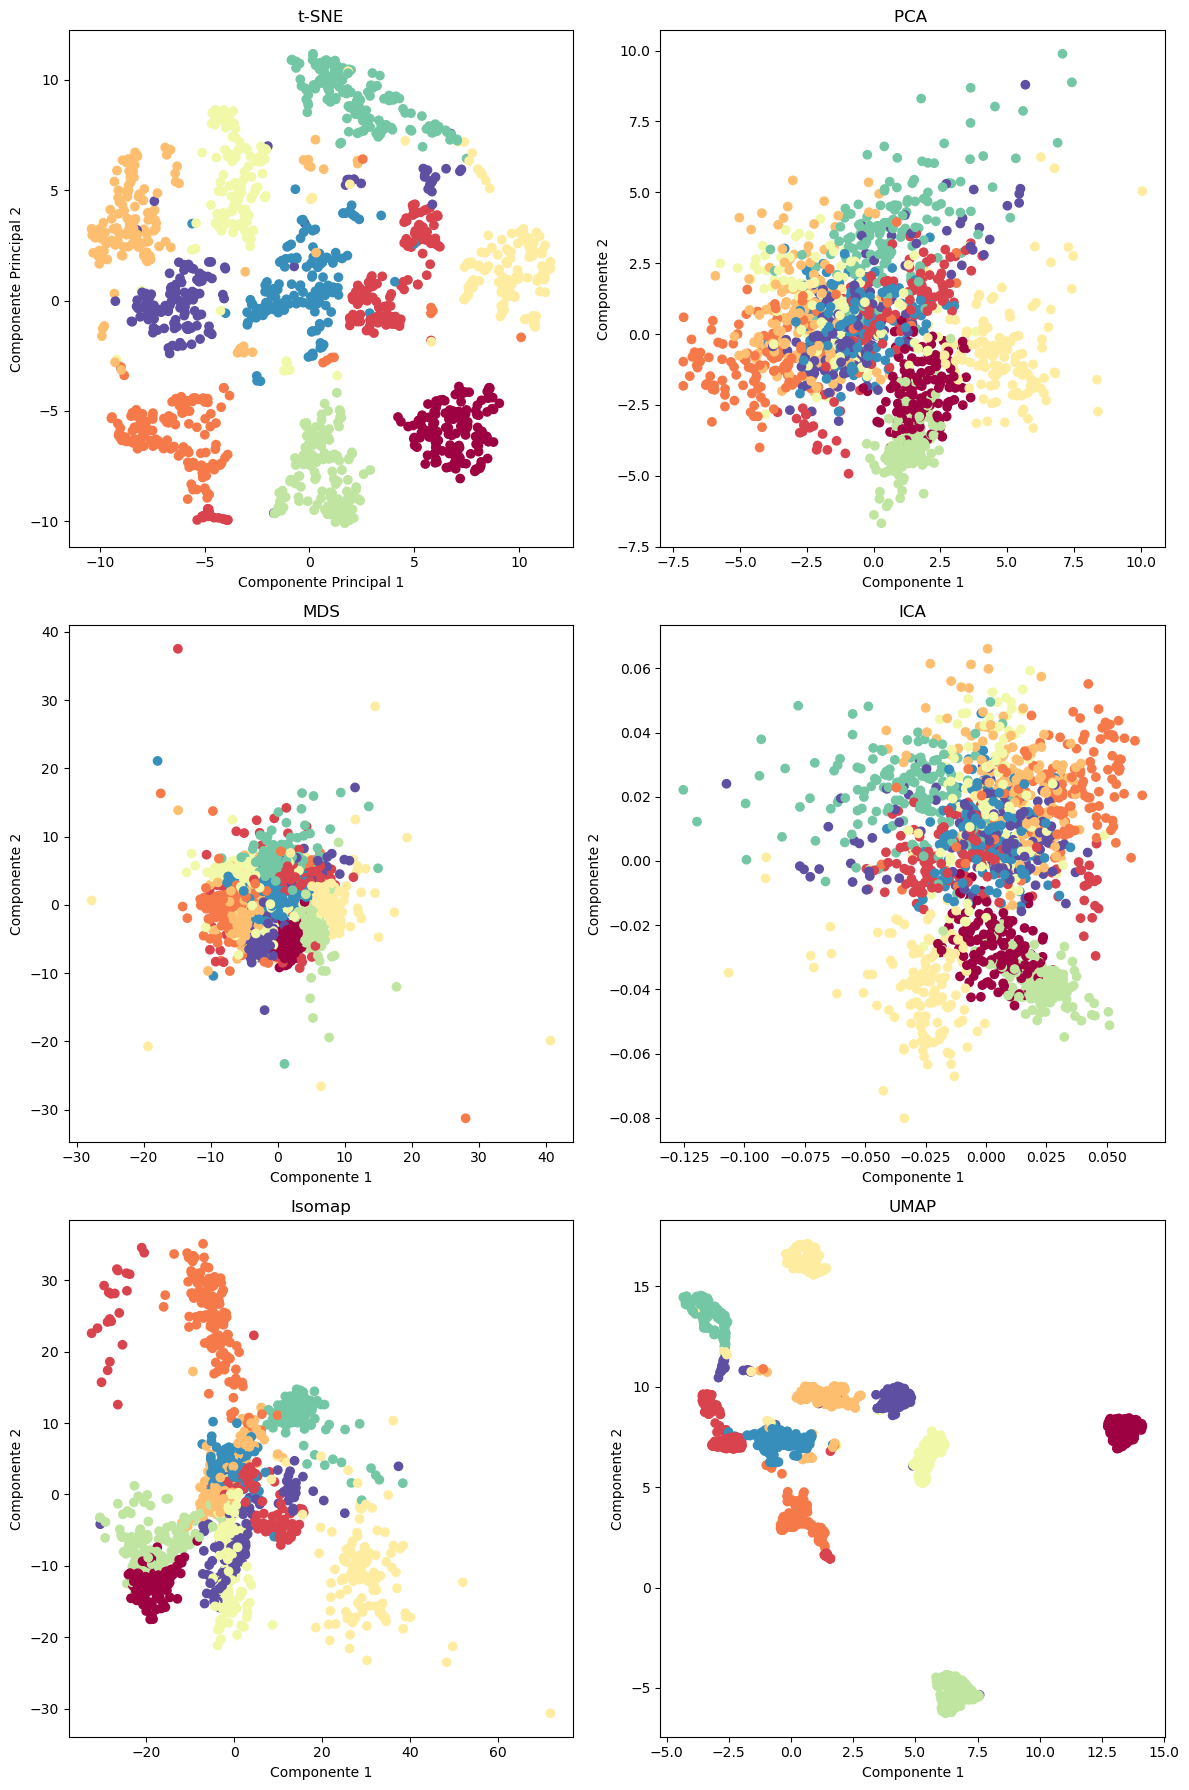

In [9]:
fig, axes = plt.subplots(3, 2, figsize=(12,18))

axes[0][0].scatter(X_tsne_train[:, 0], X_tsne_train[:, 1], c=np.array(y_train).astype(int), cmap='Spectral')
axes[0][0].set_xlabel('Componente Principal 1')
axes[0][0].set_ylabel('Componente Principal 2')
axes[0][0].set_title('t-SNE')

axes[0][1].scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=np.array(y_train).astype(int), cmap='Spectral')
axes[0][1].set_xlabel('Componente 1')
axes[0][1].set_ylabel('Componente 2')
axes[0][1].set_title('PCA ')

axes[1][0].scatter(X_mds_train[:, 0], X_mds_train[:, 1],c=np.array(y_train).astype(int), cmap='Spectral')
axes[1][0].set_xlabel('Componente 1')
axes[1][0].set_ylabel('Componente 2')
axes[1][0].set_title('MDS')

axes[1][1].scatter(X_ica_train[:, 0], X_ica_train[:, 1], c=np.array(y_train).astype(int), cmap='Spectral')
axes[1][1].set_xlabel('Componente 1')
axes[1][1].set_ylabel('Componente 2')
axes[1][1].set_title('ICA')

axes[2][0].scatter(X_isomap_train[:, 0], X_isomap_train[:, 1], c=np.array(y_train).astype(int), cmap='Spectral')
axes[2][0].set_xlabel('Componente 1')
axes[2][0].set_ylabel('Componente 2')
axes[2][0].set_title('Isomap')

axes[2][1].scatter(X_umap_train[:, 0], X_umap_train[:, 1], c=np.array(y_train).astype(int), cmap='Spectral')
axes[2][1].set_xlabel('Componente 1')
axes[2][1].set_ylabel('Componente 2')
axes[2][1].set_title('UMAP')

plt.tight_layout()

plt.show()

In [10]:
def usando_algoritmos(X_train, y_train, X_test, y_test, alg_names, algs):

    start_time = time.time()
    for alg_name in alg_names:
        
        alg = algs[alg_name]

        alg.fit(X_train, y_train)
        y_pred = alg.predict(X_test)

        acc = accuracy_score(y_pred, y_test)

        end_time = time.time()
        duration = end_time - start_time
        # Reinicia o tempo de início para o próximo loop
        start_time = time.time()
        
        print("Algoritmo:", alg_name)
        print(f"Tempo: {round(duration, 3)} segundos")
        print("Acurácia:", round(acc, 3))

        print("-------------------------------------")
    return acc

In [11]:
from my_classes import MyActLearning

In [12]:
algs = {
    'LogisticRegression': LogisticRegression(random_state=42, max_iter=1000),
    'SVC': SVC(random_state=42),
    'RandomForestClassifier': RandomForestClassifier(random_state=42),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=42),
    'GradientBoostingClassifier': GradientBoostingClassifier(random_state=42),
    'GaussianNB': GaussianNB(),
    'AdaBoostClassifier': AdaBoostClassifier(random_state=42),
    'MLPClassifier':MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42),
    'MyActLearning':MyActLearning(n_iterations=51)
}

alg_names=['LogisticRegression','SVC','RandomForestClassifier',
            'KNeighborsClassifier','DecisionTreeClassifier','GradientBoostingClassifier',
            'GaussianNB', 'AdaBoostClassifier', 'MLPClassifier','MyActLearning']

In [13]:
Xs = (X_train, X_test)
X_pca_50 = (X_train_pca50, X_test_pca50)
X_mds = (X_mds_train,X_mds_test)
X_ica = (X_ica_train,X_ica_test)
X_isomap = (X_isomap_train,X_isomap_test)
X_tsne = (X_tsne_train,X_tsne_test)
X_umap = (X_umap_train,X_umap_test)

X_reduction = [Xs, X_pca_50, X_mds, X_ica, X_isomap, X_tsne, X_umap]
reduction_names = ['Sem Redução', 'PCA 50', 'PCA', 'MDS', 'ICA', 'Isomap', 't-SNE', 'Umap']

In [14]:
for i in range(len(X_reduction)):
    print(f'######{reduction_names[i]}#######')
    resultados  = usando_algoritmos(X_reduction[i][0], y_train, X_reduction[i][1], y_test,alg_names, algs)
    # print_mean(resultados)

######Sem Redução#######


Algoritmo: LogisticRegression
Tempo: 0.774 segundos
Acurácia: 0.964
-------------------------------------
Algoritmo: SVC
Tempo: 0.185 segundos
Acurácia: 0.975
-------------------------------------
Algoritmo: RandomForestClassifier
Tempo: 0.34 segundos
Acurácia: 0.975
-------------------------------------
Algoritmo: KNeighborsClassifier
Tempo: 0.014 segundos
Acurácia: 0.969
-------------------------------------
Algoritmo: DecisionTreeClassifier
Tempo: 0.017 segundos
Acurácia: 0.836
-------------------------------------
Algoritmo: GradientBoostingClassifier
Tempo: 6.143 segundos
Acurácia: 0.964
-------------------------------------
Algoritmo: GaussianNB
Tempo: 0.003 segundos
Acurácia: 0.111
-------------------------------------
Algoritmo: AdaBoostClassifier
Tempo: 0.173 segundos
Acurácia: 0.219
-------------------------------------
Algoritmo: MLPClassifier
Tempo: 1.42 segundos
Acurácia: 0.975
-------------------------------------
Algoritmo: MyActLearning
Tempo: 1.098 segundos
Acurácia: 0

/home/gildo/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/gildo/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

Algoritmo: MyActLearning
Tempo: 6.74 segundos
Acurácia: 0.119
-------------------------------------
######Isomap#######
Algoritmo: LogisticRegression
Tempo: 0.153 segundos
Acurácia: 0.222
-------------------------------------
Algoritmo: SVC
Tempo: 0.031 segundos
Acurácia: 0.208
-------------------------------------
Algoritmo: RandomForestClassifier
Tempo: 0.209 segundos
Acurácia: 0.214
-------------------------------------
Algoritmo: KNeighborsClassifier
Tempo: 0.009 segundos
Acurácia: 0.211
-------------------------------------
Algoritmo: DecisionTreeClassifier
Tempo: 0.004 segundos
Acurácia: 0.214
-------------------------------------
Algoritmo: GradientBoostingClassifier
Tempo: 1.735 segundos
Acurácia: 0.225
-------------------------------------
Algoritmo: GaussianNB
Tempo: 0.002 segundos
Acurácia: 0.242
-------------------------------------
Algoritmo: AdaBoostClassifier
Tempo: 0.1 segundos
Acurácia: 0.278
-------------------------------------
Algoritmo: MLPClassifier
Tempo: 2.262 s

/home/gildo/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Algoritmo: LogisticRegression
Tempo: 0.385 segundos
Acurácia: 0.136
-------------------------------------
Algoritmo: SVC
Tempo: 0.027 segundos
Acurácia: 0.175
-------------------------------------
Algoritmo: RandomForestClassifier
Tempo: 0.194 segundos
Acurácia: 0.122
-------------------------------------
Algoritmo: KNeighborsClassifier
Tempo: 0.011 segundos
Acurácia: 0.186
-------------------------------------
Algoritmo: DecisionTreeClassifier
Tempo: 0.004 segundos
Acurácia: 0.122
-------------------------------------
Algoritmo: GradientBoostingClassifier
Tempo: 1.703 segundos
Acurácia: 0.125
-------------------------------------
Algoritmo: GaussianNB
Tempo: 0.003 segundos
Acurácia: 0.214
-------------------------------------
Algoritmo: AdaBoostClassifier
Tempo: 0.101 segundos
Acurácia: 0.064
-------------------------------------
Algoritmo: MLPClassifier
Tempo: 1.577 segundos
Acurácia: 0.075
-------------------------------------
Algoritmo: MyActLearning
Tempo: 2.907 segundos
Acurácia:

In [15]:
for i in range(len(X_reduction)):
    score = sortedness(Xs[0], X_reduction[i][0])
    score2 = global_pwsortedness(Xs[0], X_reduction[i][0])

    print(f"Sortedness {reduction_names[i]}:", round(score[0],3))
    print(f"Global Sortedness {reduction_names[i]}:", round(score2[0],3))
    print('----------------------------------------------------')

Sortedness Sem Redução: 1.0
Global Sortedness Sem Redução: 1.0
----------------------------------------------------
Sortedness PCA 50: 0.992
Global Sortedness PCA 50: 0.984
----------------------------------------------------
Sortedness PCA: 0.815
Global Sortedness PCA: 0.609
----------------------------------------------------
Sortedness MDS: 0.819
Global Sortedness MDS: 0.468
----------------------------------------------------
Sortedness ICA: 0.714
Global Sortedness ICA: 0.359
----------------------------------------------------
Sortedness Isomap: 0.8
Global Sortedness Isomap: 0.322
----------------------------------------------------
Sortedness t-SNE: 0.688
Global Sortedness t-SNE: 0.186
----------------------------------------------------


In [61]:
distance_metrics =[ 
  'russellrao', 
     'braycurtis',
 'canberra', 
 'chebyshev', 
 'cityblock', 
 'correlation',
  'cosine', 
  'euclidean', 
  'hamming',
   'jaccard',
   'matching',
 'minkowski'


   ]

In [62]:
from scipy.spatial.distance import pdist, squareform
n_components = 2
X_mds_metrics = []
for i, metric in enumerate(distance_metrics):
    print(metric)

    if(metric ==  'minkowski'): 
        dm = pdist(X_train, metric, p=3)
    else:
        dm = pdist(X_train, metric)
    dm = squareform(dm)
    mds = MDS(n_components=n_components, random_state=42, dissimilarity = 'precomputed', normalized_stress='auto')
    X_aux = mds.fit_transform(dm)
    X_mds_metrics.append(X_aux)
    

russellrao
braycurtis
canberra
chebyshev
cityblock
correlation
cosine
euclidean
hamming
jaccard
matching
minkowski


In [64]:
len(X_mds_metrics)

12

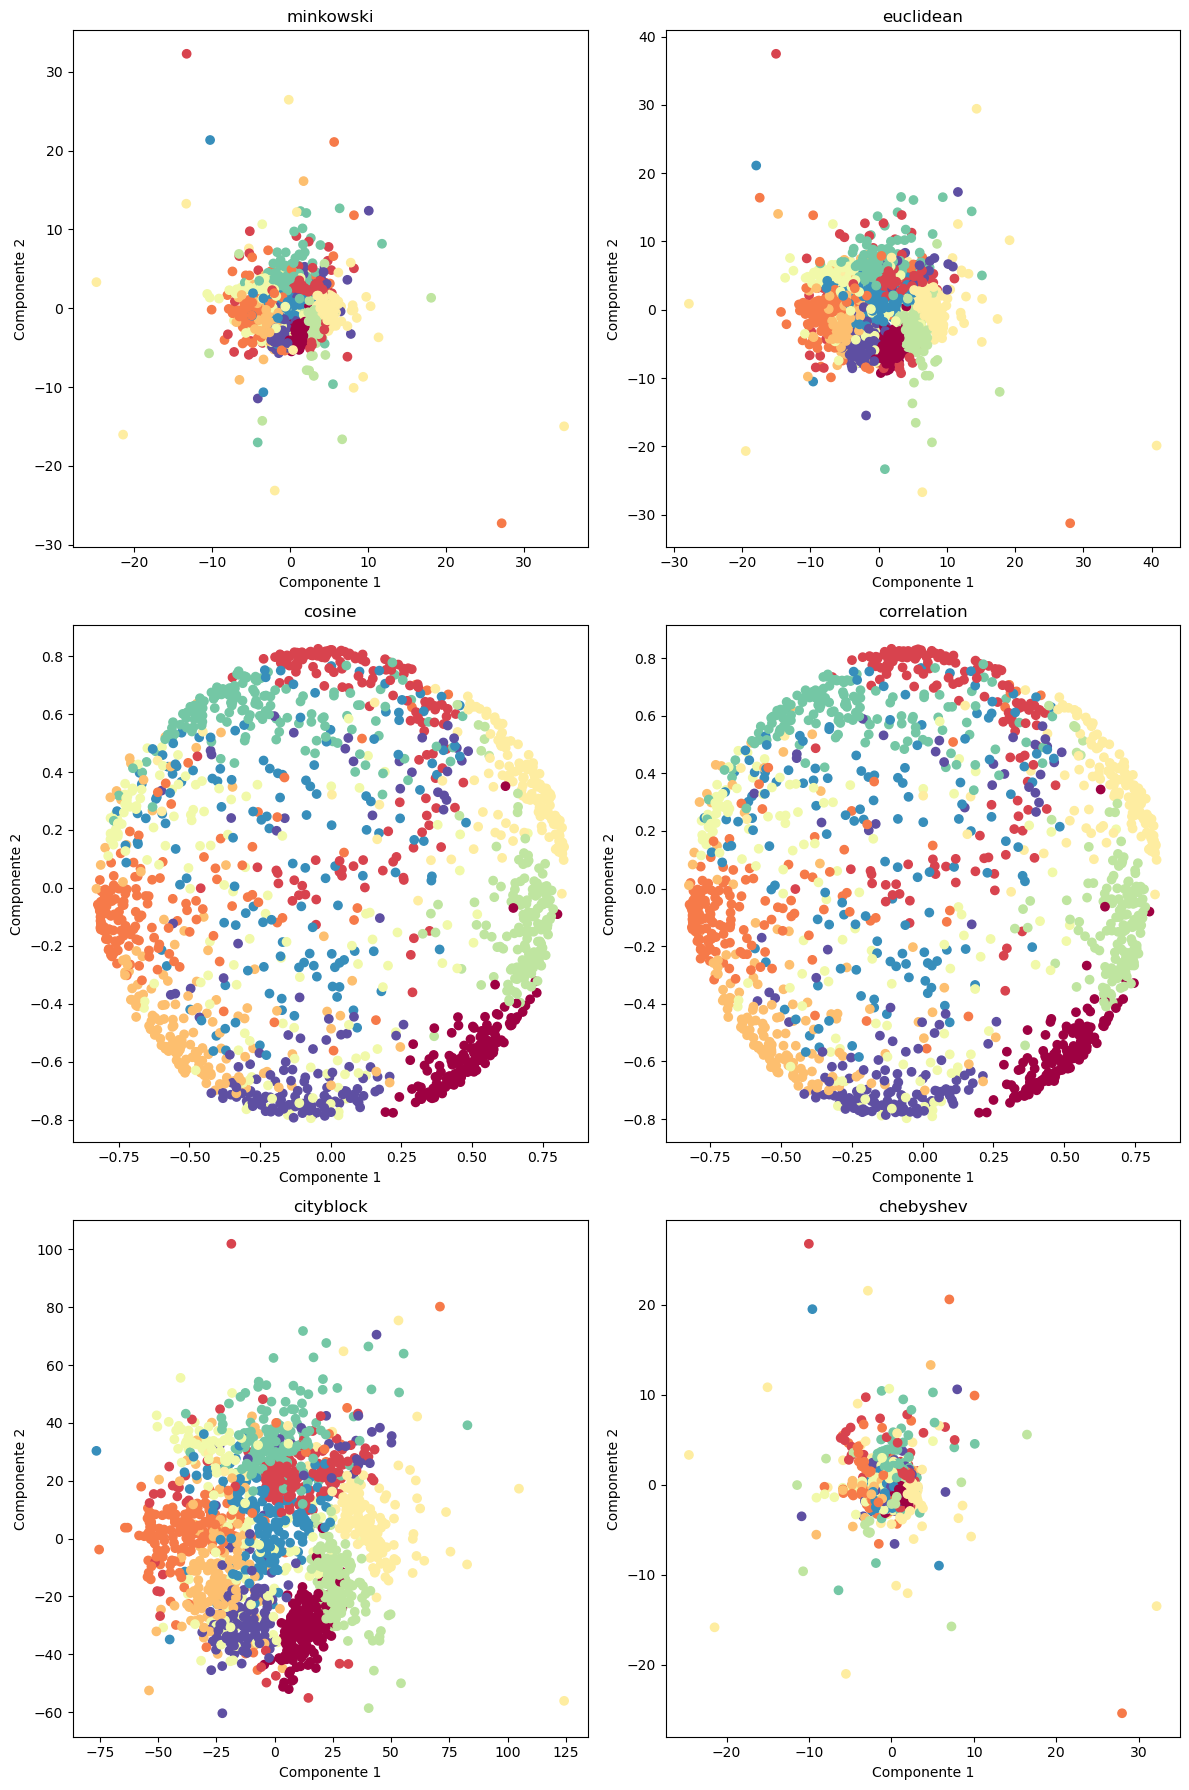

In [65]:
fig, axes = plt.subplots(3, 2, figsize=(12,18))

axes[0][0].scatter(X_mds_metrics[11][:, 0], X_mds_metrics[11][:, 1], c=np.array(y_train).astype(int), cmap='Spectral')
axes[0][0].set_xlabel('Componente 1')
axes[0][0].set_ylabel('Componente 2')
axes[0][0].set_title('minkowski')

axes[0][1].scatter(X_mds_metrics[7][:, 0], X_mds_metrics[7][:, 1], c=np.array(y_train).astype(int), cmap='Spectral')
axes[0][1].set_xlabel('Componente 1')
axes[0][1].set_ylabel('Componente 2')
axes[0][1].set_title('euclidean')

axes[1][0].scatter(X_mds_metrics[6][:, 0], X_mds_metrics[6][:, 1],c=np.array(y_train).astype(int), cmap='Spectral')
axes[1][0].set_xlabel('Componente 1')
axes[1][0].set_ylabel('Componente 2')
axes[1][0].set_title('cosine')

axes[1][1].scatter(X_mds_metrics[5][:, 0], X_mds_metrics[5][:, 1], c=np.array(y_train).astype(int), cmap='Spectral')
axes[1][1].set_xlabel('Componente 1')
axes[1][1].set_ylabel('Componente 2')
axes[1][1].set_title('correlation')

axes[2][0].scatter(X_mds_metrics[4][:, 0], X_mds_metrics[4][:, 1], c=np.array(y_train).astype(int), cmap='Spectral')
axes[2][0].set_xlabel('Componente 1')
axes[2][0].set_ylabel('Componente 2')
axes[2][0].set_title('cityblock')

axes[2][1].scatter(X_mds_metrics[3][:, 0], X_mds_metrics[3][:, 1], c=np.array(y_train).astype(int), cmap='Spectral')
axes[2][1].set_xlabel('Componente 1')
axes[2][1].set_ylabel('Componente 2')
axes[2][1].set_title('chebyshev')

plt.tight_layout()

plt.show()

In [63]:
for i in range(len(distance_metrics)):
    score = sortedness(Xs[0], X_mds_metrics[i])
    score2 = global_pwsortedness(Xs[0], X_mds_metrics[i])

    print(f"Sortedness {distance_metrics[i]}:", round(score[0],3))
    print(f"Global Sortedness {distance_metrics[i]}:", round(score2[0],3))
    print('----------------------------------------------------')

Sortedness russellrao: -0.017
Global Sortedness russellrao: 0.003
----------------------------------------------------
Sortedness braycurtis: 0.743
Global Sortedness braycurtis: 0.33
----------------------------------------------------
Sortedness canberra: 0.765
Global Sortedness canberra: 0.362
----------------------------------------------------
Sortedness chebyshev: 0.725
Global Sortedness chebyshev: 0.552
----------------------------------------------------
Sortedness cityblock: 0.785
Global Sortedness cityblock: 0.562
----------------------------------------------------
Sortedness correlation: 0.772
Global Sortedness correlation: 0.268
----------------------------------------------------
Sortedness cosine: 0.776
Global Sortedness cosine: 0.269
----------------------------------------------------
Sortedness euclidean: 0.809
Global Sortedness euclidean: 0.607
----------------------------------------------------
Sortedness hamming: 0.737
Global Sortedness hamming: 0.296
-------------

### Comentários finais

- Aparentemente não há relação entre o *Sortedness* de uma redução e sua acurácia.
- Nas piores situações, o *ActLearning* teve um desempenho superior ao *LogisticRegression*
- Três algoritmos apresentaram um desempenho consideravelmente inferior aos outros na situação sem reduação: DecisionTreeClassifier, GaussianNB, AdaBoostClassifier. Os desempenhos dos 2 últimos foram especialmente muito ruins.


==========Sem Redução=========

Algoritmo: LogisticRegression
Acurácia: 0.964

Algoritmo: SVC
Acurácia: 0.975

Algoritmo: RandomForestClassifier
Acurácia: 0.975

Algoritmo: KNeighborsClassifier
Acurácia: 0.969

Algoritmo: DecisionTreeClassifier
Acurácia: 0.836

Algoritmo: GradientBoostingClassifier
Acurácia: 0.964

Algoritmo: GaussianNB
Acurácia: 0.111

Algoritmo: AdaBoostClassifier
Acurácia: 0.219

Algoritmo: MLPClassifier
Acurácia: 0.975

Algoritmo: MyActLearning
Acurácia: 0.872

